In [3]:
# Building a large word2vec model with Gensim, for later use in a LSTM, CRF model
# Also might try to use it in other types of models like an attention model
from gensim.models import Word2Vec
from gensim.utils import simple_tokenize
from google.colab import drive
import os
import random
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
root_dir = os.path.abspath("/content/drive/My Drive/19-20/Spring/Data88/Supreme_Court")
os.chdir(root_dir)
!ls

 2_col_earl_samp.json	    all_cases.tar.gz	    SupremeCourt.ipynb
'2_col_warren (1).gsheet'   big_table.json	    topic_edge_list_warren.csv
'2_col_warren (2).gsheet'   big_table_warren.json   Topic_Model
 2_col_warren.csv	    cache		    warren_cases
 2_col_warren.gsheet	    Doc2Vec		    Word2Vec
 2_col_warren.json	    docs


In [0]:
import pandas as pd

In [0]:
table = pd.read_json("big_table_warren.json").dropna()

In [7]:
txts = []
for row in table["Opinion"]:
    txts.append(row)

print(len(txts))

3230


Output hidden; open in https://colab.research.google.com to view.

In [0]:
from gensim.utils import simple_preprocess
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def doc_to_words(sentences):
    for sentence in sentences:
      preprocess = simple_preprocess(str(sentence), deacc=True, min_len=1)
      yield [porter.stem(word) for word in preprocess]
        

In [0]:
words = list(doc_to_words(txts))

In [21]:
len(words)

3230

In [0]:
w2v = Word2Vec(words, min_count=50)

In [23]:
w2v.wv.vocab

{'unit': <gensim.models.keyedvectors.Vocab at 0x7f8585804240>,
 'state': <gensim.models.keyedvectors.Vocab at 0x7f85858042b0>,
 'suprem': <gensim.models.keyedvectors.Vocab at 0x7f855b4e87b8>,
 'court': <gensim.models.keyedvectors.Vocab at 0x7f855b4e85f8>,
 'labor': <gensim.models.keyedvectors.Vocab at 0x7f853d0575c0>,
 'board': <gensim.models.keyedvectors.Vocab at 0x7f853d057668>,
 'v': <gensim.models.keyedvectors.Vocab at 0x7f853d0576a0>,
 'seven': <gensim.models.keyedvectors.Vocab at 0x7f853d057748>,
 'up': <gensim.models.keyedvectors.Vocab at 0x7f853d057780>,
 'co': <gensim.models.keyedvectors.Vocab at 0x7f853d0577b8>,
 'no': <gensim.models.keyedvectors.Vocab at 0x7f853d0577f0>,
 'argu': <gensim.models.keyedvectors.Vocab at 0x7f853d057860>,
 'decemb': <gensim.models.keyedvectors.Vocab at 0x7f853d057898>,
 'decid': <gensim.models.keyedvectors.Vocab at 0x7f853d0578d0>,
 'januari': <gensim.models.keyedvectors.Vocab at 0x7f853d057940>,
 'under': <gensim.models.keyedvectors.Vocab at 0x7f

In [24]:
w2v.save(root_dir + "fullword2vecmincount50.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [25]:
model = Word2Vec.load(root_dir + "fullword2vecmincount50.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
def most_similar(model, word):
  print(f"Most similar words to '{porter.stem(word)}':")
  return model.wv.most_similar(porter.stem(word))

In [44]:
most_similar(model, 'criminal')

Most similar words to 'crimin':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('perjuri', 0.5421716570854187),
 ('penal', 0.5410142540931702),
 ('recidivist', 0.5387814044952393),
 ('crime', 0.5263317823410034),
 ('feloni', 0.5131350755691528),
 ('offend', 0.5108052492141724),
 ('misdemeanor', 0.4920322000980377),
 ('treason', 0.4758322238922119),
 ('contempt', 0.4641178548336029),
 ('civil', 0.4428991377353668)]

In [42]:
most_similar(model, 'history')

Most similar words to 'histori':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('languag', 0.560425341129303),
 ('evolut', 0.5355239510536194),
 ('background', 0.5347286462783813),
 ('debat', 0.4959656000137329),
 ('context', 0.4944581687450409),
 ('text', 0.49310311675071716),
 ('gloss', 0.485916405916214),
 ('enact', 0.476545512676239),
 ('breadth', 0.47266069054603577),
 ('passag', 0.4697172939777374)]

In [45]:
most_similar(model, "intentional")

Most similar words to 'intent':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('intend', 0.5759415626525879),
 ('attempt', 0.5679241418838501),
 ('imput', 0.5183023810386658),
 ('purpos', 0.5106310844421387),
 ('desir', 0.45615720748901367),
 ('mandat', 0.45526760816574097),
 ('unambigu', 0.4518594741821289),
 ('effort', 0.444200336933136),
 ('deliber', 0.43778693675994873),
 ('willing', 0.43687036633491516)]

In [46]:
most_similar(model, 'race')

Most similar words to 'race':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('creed', 0.763013482093811),
 ('color', 0.7057161331176758),
 ('sect', 0.6448627710342407),
 ('caucasian', 0.5985392332077026),
 ('religi', 0.5969142913818359),
 ('faculti', 0.5887744426727295),
 ('worship', 0.5789809226989746),
 ('religion', 0.578945517539978),
 ('slave', 0.572697639465332),
 ('sectarian', 0.5691241025924683)]

In [67]:
most_similar(model, 'segregation')

Most similar words to 'segreg':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('racial', 0.7825061082839966),
 ('pupil', 0.6072420477867126),
 ('desegreg', 0.5972586870193481),
 ('school', 0.578663170337677),
 ('elementari', 0.5654054880142212),
 ('park', 0.5446624755859375),
 ('parochi', 0.5407179594039917),
 ('race', 0.5381132364273071),
 ('classroom', 0.515426754951477),
 ('cathol', 0.5043361783027649)]

In [68]:
most_similar(model, 'freedom')

Most similar words to 'freedom':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('free', 0.6754978895187378),
 ('inhibit', 0.6717078685760498),
 ('liberti', 0.6659626364707947),
 ('speech', 0.6630364060401917),
 ('privaci', 0.6588311195373535),
 ('idea', 0.651490330696106),
 ('religion', 0.6205966472625732),
 ('digniti', 0.6192458868026733),
 ('inviol', 0.6045374274253845),
 ('press', 0.5819698572158813)]

In [69]:
most_similar(model, 'justice')

Most similar words to 'justic':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sawyer', 0.5946205258369446),
 ('vanderbilt', 0.5874308943748474),
 ('bess', 0.5226938724517822),
 ('yellin', 0.5027024149894714),
 ('sacher', 0.49366384744644165),
 ('covert', 0.47844013571739197),
 ('donner', 0.47045981884002686),
 ('armstrong', 0.46948564052581787),
 ('landi', 0.44895756244659424),
 ('fitzpatrick', 0.4456489086151123)]

In [70]:
most_similar(model, 'court')

Most similar words to 'court':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('judg', 0.5780285000801086),
 ('we', 0.468797504901886),
 ('error', 0.45832568407058716),
 ('commiss', 0.44917988777160645),
 ('columbia', 0.44328317046165466),
 ('case', 0.4180035889148712),
 ('merit', 0.41576677560806274),
 ('er', 0.4098079800605774),
 ('correct', 0.4025862514972687),
 ('us', 0.39393144845962524)]

In [71]:
most_similar(model, 'obscene')

Most similar words to 'obscen':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('indec', 0.6819642186164856),
 ('objection', 0.6220028400421143),
 ('lewd', 0.5941242575645447),
 ('lascivi', 0.5609196424484253),
 ('pornographi', 0.5598780512809753),
 ('censorship', 0.5390530824661255),
 ('magazin', 0.536469578742981),
 ('book', 0.5345168113708496),
 ('sex', 0.5202738642692566),
 ('movi', 0.5165270566940308)]

In [0]:
len(model.wv.vocab)

35939

In [74]:
most_similar(model, 'forget')

Most similar words to 'forget':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('feel', 0.7468759417533875),
 ('rememb', 0.6716569662094116),
 ('perceiv', 0.6476607322692871),
 ('tell', 0.6379157304763794),
 ('know', 0.6355852484703064),
 ('guess', 0.6345842480659485),
 ('hope', 0.6272090673446655),
 ('imagin', 0.6186466813087463),
 ('regret', 0.6142436265945435),
 ('remind', 0.6019313335418701)]

In [52]:
most_similar(model,'obscene')

Most similar words to 'obscen':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('indec', 0.6819642186164856),
 ('objection', 0.6220028400421143),
 ('lewd', 0.5941242575645447),
 ('lascivi', 0.5609196424484253),
 ('pornographi', 0.5598780512809753),
 ('censorship', 0.5390530824661255),
 ('magazin', 0.536469578742981),
 ('book', 0.5345168113708496),
 ('sex', 0.5202738642692566),
 ('movi', 0.5165270566940308)]

In [64]:
most_similar(model,'separate')

Most similar words to 'separ':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('singl', 0.4860628843307495),
 ('differ', 0.47949039936065674),
 ('noncapit', 0.469820111989975),
 ('two', 0.3952854871749878),
 ('vari', 0.3913206160068512),
 ('multipl', 0.3869659900665283),
 ('straight', 0.3780604600906372),
 ('combin', 0.36340564489364624),
 ('dissimilar', 0.36334723234176636),
 ('these', 0.3610576093196869)]

In [48]:
most_similar(model,'love')

Most similar words to 'love':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sin', 0.7372783422470093),
 ('friend', 0.6888986825942993),
 ('young', 0.657794177532196),
 ('everybodi', 0.6533921360969543),
 ('mother', 0.6495003700256348),
 ('cultur', 0.6482493281364441),
 ('fortun', 0.6419206261634827),
 ('rich', 0.6415947079658508),
 ('sex', 0.6407911777496338),
 ('emot', 0.6401965618133545)]

In [72]:
most_similar(model, 'intent')

Most similar words to 'intent':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('intend', 0.5759415626525879),
 ('attempt', 0.5679241418838501),
 ('imput', 0.5183023810386658),
 ('purpos', 0.5106310844421387),
 ('desir', 0.45615720748901367),
 ('mandat', 0.45526760816574097),
 ('unambigu', 0.4518594741821289),
 ('effort', 0.444200336933136),
 ('deliber', 0.43778693675994873),
 ('willing', 0.43687036633491516)]

In [47]:
most_similar(model,'bias')

Most similar words to 'bia':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('wrongdo', 0.7095663547515869),
 ('misconduct', 0.6402214765548706),
 ('prejudic', 0.6258642673492432),
 ('coercion', 0.6082481741905212),
 ('innoc', 0.5955129265785217),
 ('disloyalti', 0.5767170190811157),
 ('guilt', 0.5747528672218323),
 ('falsiti', 0.5556035041809082),
 ('oppress', 0.5493159294128418),
 ('bias', 0.5335648059844971)]

In [75]:
most_similar(model, 'person')

Most similar words to 'person':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('alien', 0.6106441617012024),
 ('man', 0.5924121141433716),
 ('child', 0.5813305377960205),
 ('citizen', 0.5797073245048523),
 ('parent', 0.5627975463867188),
 ('individu', 0.5573372840881348),
 ('or', 0.5531572103500366),
 ('anyon', 0.5465134382247925),
 ('claimant', 0.5431055426597595),
 ('knowingli', 0.5248701572418213)]

In [77]:
most_similar(model, 'school')

Most similar words to 'school':


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('student', 0.6691609025001526),
 ('pupil', 0.6596291065216064),
 ('enrol', 0.6510168313980103),
 ('educ', 0.6362299919128418),
 ('graduat', 0.6050884127616882),
 ('desegreg', 0.5990810990333557),
 ('colleg', 0.5964565277099609),
 ('textbook', 0.5903171896934509),
 ('sectarian', 0.5839107036590576),
 ('librari', 0.5829277038574219)]

In [0]:
wrongmodel.similarity('pornography', "vulgar")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.5838908

In [0]:
from sklearn.decomposition import PCA

In [0]:
words = []
vectors = []
for elem in model.wv.vocab:
  words.append(elem)
  vectors.append(model[elem])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [0]:
print(words[0:10])
print(vectors[0:10])

['united', 'states', 'supreme', 'court', 'labor', 'board', 'v', 'seven', 'up', 'co']
[array([ 1.0500836 , -3.9052067 , -1.0966108 ,  1.7375966 ,  0.16445804,
        0.5720315 , -0.9395912 ,  1.1135713 , -0.18798716,  2.1326957 ,
        5.0204296 ,  0.27565202,  1.5572404 ,  0.77081615,  3.35671   ,
       -0.74142134, -1.9782493 , -2.3168943 , -2.716865  , -2.5840628 ,
       -3.7659163 , -1.3602005 ,  1.3679414 , -1.3938746 ,  1.0302463 ,
       -0.6364476 , -0.45732725,  0.31645516, -1.048284  ,  3.7222638 ,
       -0.17169484,  1.479227  ,  0.5412672 ,  1.6034942 ,  0.91734225,
        0.88129586,  3.529719  ,  1.7990409 ,  0.3190881 , -1.3663589 ,
        0.597424  ,  0.19785398,  1.8032947 ,  0.13613178,  0.08390508,
        1.6365248 ,  2.1118984 ,  2.8361483 ,  1.8390166 ,  3.5227108 ,
        3.9700904 , -2.3391352 ,  0.50981396, -0.26039544,  0.55023897,
        3.2688096 , -0.15170339,  0.91209275, -2.6387892 ,  0.36110267,
       -2.3029206 , -1.6623354 , -5.886464  ,  1.8

In [0]:
import numpy as np
import matplotlib.pyplot as plt
vectors = np.array(vectors)

In [0]:
pca = PCA(n_components=2)

In [0]:
two_best = pca.fit(vectors).transform(vectors)

In [0]:
sample_words = []
sample_best = []
for i in range(len(words)):
  if random.uniform(0, 1) > 0.999:
    sample_words.append(words[i])
    sample_best.append(two_best[i])


In [0]:
def top_similar(word, topn = 10):
  results = model.most_similar(word, topn = topn)
  words = []
  for word in results:
    words.append(word[0])
  return results

top_similar("criminal")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('perjury', 0.5613951683044434),
 ('recidivist', 0.5545429587364197),
 ('penal', 0.5519534349441528),
 ('felony', 0.5434715747833252),
 ('contempt', 0.5185948014259338),
 ('severer', 0.5053268671035767),
 ('crime', 0.503585696220398),
 ('punishment', 0.49704617261886597),
 ('noncapital', 0.4586816430091858),
 ('treason', 0.45766472816467285)]

In [0]:
sample_best = np.array(sample_best)

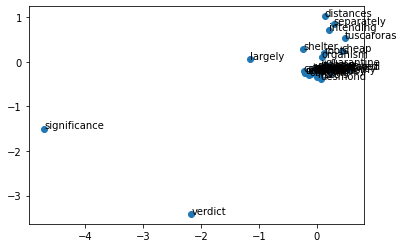

<Figure size 1440x720 with 0 Axes>

In [0]:
fig, ax = plt.subplots()
ax.scatter(sample_best[:, 0], sample_best[:, 1])
fig.figsize = (10, 10)

for i, txt in enumerate(sample_words):
    ax.annotate(txt, (sample_best[i, 0], sample_best[i, 1]))
plt.figure(figsize=(20,10))
plt.show()